In [ ]:
# подготовка датасета была осуществлена в другом ноутбуке

In [8]:
import pandas as pd

import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

import matplotlib as plt
import matplotlib.pyplot as pyplot

In [4]:
df_file = "ips_prepared_dataset.csv"

df = pd.read_csv(df_file, sep=';')

print(sorted(df.columns))
print(df.shape)

['oct1', 'oct2', 'oct3', 'oct4', 'pca1', 'pca2', 'src_ip']
(716, 7)


In [5]:
df.head(5)

,src_ip,oct1,oct2,oct3,oct4,pca1,pca2
0,192.168.121.1,192,168,121,1,-97.857846,3.385151
1,192.168.121.2,192,168,121,2,-96.857872,3.392334
2,192.168.121.3,192,168,121,3,-95.857898,3.399517
3,192.168.121.4,192,168,121,4,-94.857924,3.406700
4,192.168.121.7,192,168,121,7,-91.858001,3.428250


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   src_ip  716 non-null    object 
 1   oct1    716 non-null    int64  
 2   oct2    716 non-null    int64  
 3   oct3    716 non-null    int64  
 4   oct4    716 non-null    int64  
 5   pca1    716 non-null    float64
 6   pca2    716 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 39.3+ KB


In [10]:
X_matrix_src = np.array(df[['oct1', 'oct2', 'oct3', 'oct4']])
print(X_matrix_src.shape)
print(X_matrix_src[0:5])

(716, 4)
[[192 168 121   1]
 [192 168 121   2]
 [192 168 121   3]
 [192 168 121   4]
 [192 168 121   7]]


In [11]:
tightness = []
possibleKs = range(1,10)

for k in possibleKs:
    km = KMeans(n_clusters=k).fit(X_matrix_src)
    tightness.append(sum(np.min(cdist(X_matrix_src, \
         km.cluster_centers_, 'euclidean'), axis=1)) / X_matrix_src.shape[0])

C:\Users\09581\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\09581\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\09581\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\09581\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

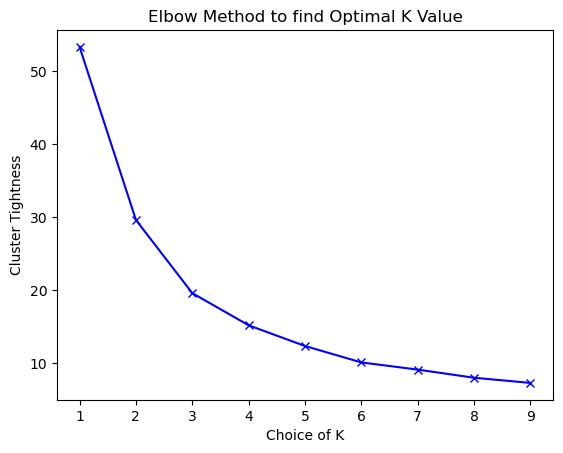

In [12]:
pyplot.plot(possibleKs, tightness, 'bx-')
pyplot.xlabel('Choice of K')
pyplot.ylabel('Cluster Tightness')
pyplot.title('Elbow Method to find Optimal K Value')
pyplot.show()

In [15]:
srs_ip_df = df.copy()

In [16]:
kclusters=6
kms = KMeans(n_clusters=kclusters,n_init=200,random_state=0)

kms.fit_predict(X_matrix_src)

srs_ip_df['kcluster']=kms.labels_.tolist()

C:\Users\09581\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [18]:
srs_ip_df

,src_ip,oct1,oct2,oct3,oct4,pca1,pca2,kcluster
0,192.168.121.1,192,168,121,1,-97.857846,3.385151,3
1,192.168.121.2,192,168,121,2,-96.857872,3.392334,3
2,192.168.121.3,192,168,121,3,-95.857898,3.399517,3
3,192.168.121.4,192,168,121,4,-94.857924,3.406700,3
4,192.168.121.7,192,168,121,7,-91.858001,3.428250,3
...,...,...,...,...,...,...,...,...
711,192.168.125.130,192,168,125,130,31.167558,0.311877,5
712,192.168.125.245,192,168,125,245,146.164591,1.137937,4
713,192.168.127.2,192,168,127,2,-96.814773,-2.607511,3
714,192.168.127.94,192,168,127,94,-4.817147,-1.946664,2


In [19]:
dfkms0=srs_ip_df[srs_ip_df.kcluster==0]
dfkms1=srs_ip_df[srs_ip_df.kcluster==1]
dfkms2=srs_ip_df[srs_ip_df.kcluster==2]
dfkms3=srs_ip_df[srs_ip_df.kcluster==3]
dfkms4=srs_ip_df[srs_ip_df.kcluster==4]
dfkms5=srs_ip_df[srs_ip_df.kcluster==5]
#dfkms6=srs_ip_df[srs_ip_df.kcluster==6]

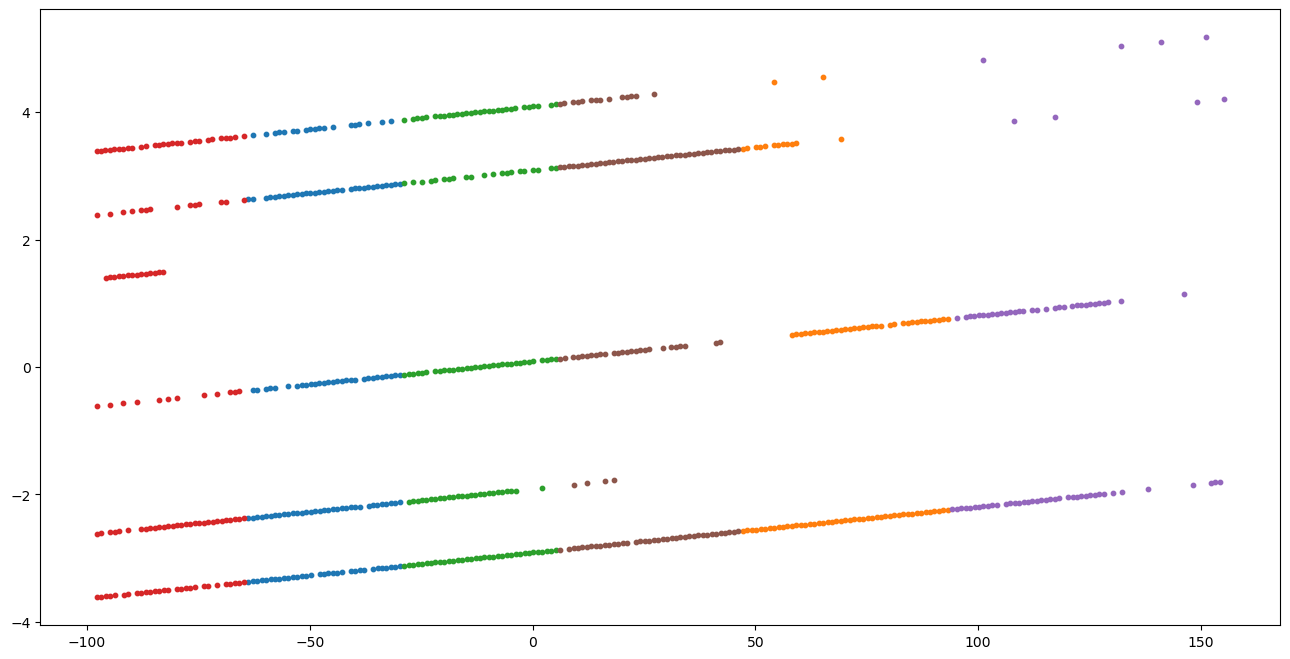

In [22]:
plt.rcParams["figure.figsize"] = (16,8)
pyplot.scatter(dfkms0['pca1'],dfkms0['pca2'],s=10,label="cl 0")
pyplot.scatter(dfkms1['pca1'],dfkms1['pca2'],s=10,label="cl 1")
pyplot.scatter(dfkms2['pca1'],dfkms2['pca2'],s=10,label="cl 2")
pyplot.scatter(dfkms3['pca1'],dfkms3['pca2'],s=10,label="cl 3")
pyplot.scatter(dfkms4['pca1'],dfkms4['pca2'],s=10,label="cl 4")
pyplot.scatter(dfkms5['pca1'],dfkms5['pca2'],s=10,label="cl 5")
# pyplot.scatter(dfkms6['pca1'],dfkms6['pca2'],s=10,label="cl 6")

pyplot.show()